In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
For sufficiently large datasets (>10000 rows), the SVM 'rbf' kernel is not practical as it as a time complexity of approximately
O(n^2) [O(n^3) including the grid search]
For situations like these, we need to use the linear kernel. sklearn has a built in library LinearSVC that is optimized for linear kernel SVMs models
In addition, I will also demo Pipeline models as these will also streamline your workflow, but they are ultimately unnecessary
as they have no impact on computation time or accuracy

'''
# Cardio_train.csv contains 70000 rows of data that includes diagnostic factors regarding cardiovascular disease
# We want to make a model that predicts whether or not the people in this dataset have a Cardiovascular disease (1) or not (0)
# based on the diagnostic columns
# We then want to compare the model to the actual results using a confusion matrix

# Read data from diabetes.csv to pandas dataframe
df = pd.read_csv('cardio_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
# Preliminary info on dataset
df.shape

(70000, 13)

In [13]:
# Create the steps for a pipeline object
# A pipeline object is a collection of other objects
# In this case, the pipe contains the variables properly standardized and the LinearSVC model
steps = [('scaler', StandardScaler()), ('SVM', LinearSVC(random_state=0))]

# Split dataset into training and testing sets
X, y = df.drop('cardio',axis=1), df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0,stratify=y)


In [14]:
'''
NOTE YOu WILL PRINT OUT FAILURE TO CONVERGE WARNINGS. IGNORE THEM.
THIS CODE TAKES AN ENTIRE MINUTE TO RUN.
'''


# Defining Parameter Grid Dictionary for Hyper Parameter Tuning
param_grid = {'SVM__C': [ 1, 10, 100, 1000, 10000]}


# Create a Pipeline Object with Standardized variables and model for the Grid Search
pipeline = Pipeline(steps)

# GridSearchCV searches over parameter grid and takes the best values (known as refitting)
grid = GridSearchCV(pipeline, param_grid);
grid_search = grid.fit(X_train, y_train);


# Get the best parameters from the Grid Search
C_value = grid_search.best_params_['SVM__C']

# Create a new pipeline that has the standardized variables and the linear svc with the optimal parameters from the grid search
# Fit Pipeline with your Data
new_steps = [('scaler', StandardScaler()), ('SVM', LinearSVC(C = C_value, random_state=0))]
new_pipeline = Pipeline(new_steps)
new_pipeline.fit(X_train, y_train)

# Use SVM_model to Create Prediction
y_prediction = new_pipeline.predict(X_test)

# Create Confusion Matrix Comparing the Predictions to Actual Results
cm = confusion_matrix(y_test, y_prediction)


# Print Best Parameters from Grid Search
print(f'The Best Parameters from the Grid Search: {grid.best_params_}')

/Users/ahadhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahadhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahadhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahadhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahadhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

The Best Parameters from the Grid Search: {'SVM__C': 10}


/Users/ahadhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


'\nNOTE YOu WILL PRINT OUT FAILURE TO CONVERGE WARNINGS. IGNORE THEM.\nTHIS CODE TAKES AN ENTIRE MINUTE TO RUN.\n'

Model Accuracy for our Training Dataset with Tuning: 70.87%


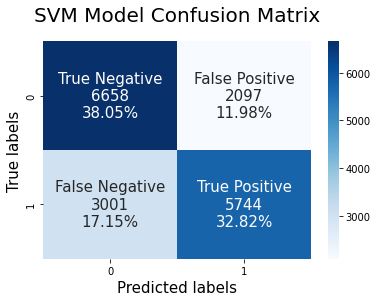

In [15]:
# Create labels for the Confusion Matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Plot the Confusion Matrix
ax = plt.gca()
sns.heatmap(cm, annot=labels, fmt='', ax=ax, cmap = plt.cm.Blues,annot_kws={"fontsize":15});  # fmt = '' is necessary because fmt = 'g' (scientific notation format) is default
ax.set_xlabel('Predicted labels', fontsize = 15);
ax.set_ylabel('True labels', fontsize = 15); 
ax.set_title('SVM Model Confusion Matrix', pad = 20, fontsize=20);

# Print Accuracy Score
print("Model Accuracy for our Training Dataset with Tuning: {:.2f}%".format(accuracy_score(y_test, y_prediction) * 100))